In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
df.shape

(7043, 21)

We will build a deep learning model that predicts whether a customer will churn. To do this, we need to convert the values of the churn column into machine-readable labels. Wherever the value in the churn column is “no,” we will assign an integer label of “0” and churn values of “yes” will have an integer label of “1.”



In [3]:
import numpy as np
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In our deep learning model, we will want to use both categorical and numerical features. Similar to the labels, we need to convert the categorical values into machine-readable numbers that we can use to train our model. Let’s define a simple function that performs this task:

In [9]:
def convert_categories(cat_list):
    for col in cat_list:
        df[col] = df[col].astype('category')
        df[f'{col}_cat'] = df[f'{col}'].cat.codes

In [10]:
category_list = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [11]:
convert_categories(category_list)

In [12]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... InternetService_cat  \
0  No phone service             DSL             No  ...                   0   
1                No             DSL            Yes  ...                   0   
2                No             DSL            Yes  ...                   0   
3  No phone service             DSL            Yes  ...                   0   
4                No     Fiber optic             No  ...                   1   

  OnlineSecurity_cat OnlineBackup_cat Device

In [13]:
df.shape

(7043, 36)

In [14]:
df.gender_cat

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender_cat, Length: 7043, dtype: int8

In [15]:
df['TotalCharges'].tail(20)

7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, dtype: object

The next thing we need to do is force the TotalCharges column to be a float since there are some non-numeric, meaning bad, values in this column. Non-numeric values are converted to a “not a number” value (NaN), and we replace the NaN values with 0:

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

Next, let’s define our input and output:

In [17]:
cols = ['gender_cat', 'Partner_cat', 'Dependents_cat', 'PhoneService_cat', 'MultipleLines_cat', 'InternetService_cat',
                  'OnlineSecurity_cat', 'OnlineBackup_cat', 'DeviceProtection_cat', 'TechSupport_cat', 'StreamingTV_cat',
                  'StreamingMovies_cat', 'Contract_cat', 'PaperlessBilling_cat', 'PaymentMethod_cat','MonthlyCharges',
                  'TotalCharges', 'SeniorCitizen']
X = df[cols]
y= df['Churn']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test_hold_out, y_train, y_test_hold_out = train_test_split(X, y, test_size=0.33)

# Deep Neural Network Loss Functions for Classification

Binary cross-entropy

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

In [22]:
print((len(cols,)))

18


Kernel initializers are used to statistically initialise the weights in the model. This will generate the weights and distribute them, it can be used as the starting weights.

Here comes the need of Weight Initializer (Kernel Initializer). It helps to overcome the problems associated with the use of inappropriate initial weights while creating a Deep Neural Network.

In [24]:
model_bce = Sequential()

# The input tensor defines the shape of the data that will be fed into the model. In Keras, you can define the input tensor using the Input layer. In this example, we define an input tensor with a shape of (18,), which means that it will accept input data with 10 features per sample.

for example dataset with this shape: shape (1461, 75). 
The number of rows in your training data is not part of the input shape of the network because the training process feeds the network one sample per batch (or, more precisely, batch_size samples per batch). And in input_shape, the batch dimension is not included for the first layer.

So, the input shape for your problem will be:input_shape=(75, )

In [25]:
model_bce.add(Dense(len(cols),input_shape=(len(cols),), kernel_initializer='normal', activation='relu'))

Next, we will add three hidden layers using the add method. These layers will have 32 neurons and also use a ReLu activation function:

In [26]:
model_bce.add(Dense(32, activation='relu'))
model_bce.add(Dense(32, activation='relu'))
model_bce.add(Dense(32, activation='relu'))

We then need to add the output layer, which will have one neuron and a softmax activation function. This will allow our model to output class probabilities for predicting whether a customer will churn:

In [27]:
model_bce.add(Dense(1, activation='softmax'))

Finally, we will use the compile method on our model instance to specify the loss function we will use. To start, we will specify the binary cross-entropy loss function, which is best suited for the type of machine learning problem we’re working on here.

In [32]:
model_bce.compile(optimizer = 'adam',loss='binary_crossentropy', metrics =['accuracy'])

In [33]:
model_bce.fit(X_train, y_train,epochs =20)

Epoch 1/20
148/148 [==============================] - 1s 1ms/step - loss: 1.3755 - accuracy: 0.2683
Epoch 2/20
148/148 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.2683
Epoch 3/20
148/148 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.2683
Epoch 4/20
148/148 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.2683
Epoch 5/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.2683
Epoch 6/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.2683
Epoch 7/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.2683
Epoch 8/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.2683
Epoch 9/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.2683
Epoch 10/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.2683

We see that, for each of the 10 epochs, we have a value for our loss function. We see that with each epoch our loss decreases which means that our model improves over the course of training.

Binary cross-entropy is most useful for binary classification problems. In our churn example, we were predicting one of two outcomes: either a customer will churn or not. If you’re working on a classification problem where there are more than two prediction outcomes, however, sparse categorical cross-entropy is a more suitable loss function.

# Sparse Categorical cross-entropy

In order to apply the categorical cross-entropy loss function to a suitable use case, we need to use a data set that contains more than two labels. Here, we will work with the MNIST data set, which contains images of hand-written digits between zero and 9. Let’s start by importing the data:

In [38]:
import pandas as pd 
import numpy as np 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [39]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

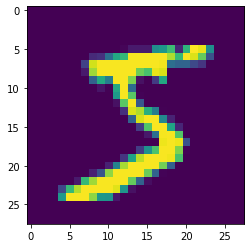

In [40]:
plt.imshow(X_train_mnist[0])
plt.show()

In [41]:
 y_train_mnist[0]

5

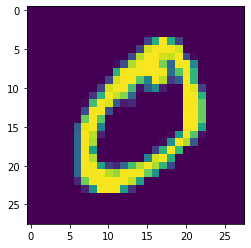

In [42]:
plt.imshow(X_train_mnist[1])
plt.show()

In [43]:
y_train_mnist[1]

0

In [44]:
X_train_mnist.shape

(60000, 28, 28)

In [45]:
X_train_mnist.shape[0]

60000

Let’s reformat the data so that we can use it to train our model:

In [46]:
X_train_mnist = X_train_mnist.reshape((X_train_mnist.shape[0], 28, 28, 1))

In [47]:
X_train_mnist

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [48]:
X_train_mnist[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

Next, we need to generate binary labels from our classes. Let’s build a model that predicts whether or not an image contains the number nine. We will assign a label of “1” to images with a number nine. Any other number that is not nine will have a label of “0.” This type of problem is different from multilabel classification where we would have 9 labels corresponding to each of the 9 digits.

In [49]:
y_train_mnist = np.where(y_train_mnist == 9, 1, 0)
y_test_mnist = np.where(y_test_mnist == 9, 1, 0)

In [50]:
model_cce = Sequential()
model_cce.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='normal', input_shape=(28, 28, 1)))
model_cce.add(MaxPooling2D((2, 2)))
model_cce.add(Flatten())
model_cce.add(Dense(16, activation='relu', kernel_initializer='normal'))
model_cce.add(Dense(2, activation='softmax'))

In our compile layer, we will specify the sparse categorical cross entropy loss function:

In [51]:
model_cce.compile(optimizer = 'SGD',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [52]:
model_cce.fit(X_train_mnist, y_train_mnist, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2860 - accuracy: 0.9467
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0682 - accuracy: 0.9800
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0405 - accuracy: 0.9875


In [53]:
y_predict = model_cce.predict(X_train_mnist)

In [54]:
y_predict

array([[9.9999249e-01, 7.5514231e-06],
       [9.9929488e-01, 7.0515455e-04],
       [9.9950004e-01, 4.9992732e-04],
       ...,
       [9.9821907e-01, 1.7809074e-03],
       [9.9999547e-01, 4.5242291e-06],
       [9.3973941e-01, 6.0260672e-02]], dtype=float32)

In [56]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [67]:
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/SemiSupervisedLearning/diabetes.csv') 
print(df.shape)
df.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The first line of code creates an object of the target variable, while the second line of code gives the list of all the features after excluding the target variable, 'diabetes'.

The third line does normalization of the predictors via scaling between 0 and 1. This is needed to eliminate the influence of the predictor's units and magnitude on the modelling process.

The fourth line displays the summary of the normalized data. The target variable remains unchanged.

In [68]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))

In [69]:
predictors

['BMI',
 'BloodPressure',
 'Age',
 'DiabetesPedigreeFunction',
 'Pregnancies',
 'Insulin',
 'SkinThickness',
 'Glucose']

In [70]:
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [72]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


Since our target variable represents a binary category which has been coded as numbers 0 and 1, we will have to encode it. We can easily achieve that using the "to_categorical" function from the Keras utilities package. The two lines of code below accomplishes that in both training and test datasets.

In [73]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

we will jave the softmax function that will give a percentage to each value, that sum 1, the maximum is the prediction. 

In [74]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [75]:
y_train[0]

array([0., 1.], dtype=float32)

In [76]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [79]:
y_test.shape

(231, 2)

In [80]:
X.shape

(768, 8)

The second line of code represents the input layer which specifies the activation function and the number of input dimensions, which in our case is 8 predictors.

In [81]:
model = Sequential()
model.add(Dense(537, activation='relu', input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

binary_crossentropy: Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels. categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

In [82]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [83]:
# build the model
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
17/17 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6555
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6667
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.6667
Epoch 4/30
17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6946
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7207
Epoch 6/30
17/17 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7374
Epoch 7/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7486
Epoch 8/30
17/17 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7561
Epoch 9/30
17/17 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7747
Epoch 10/30
17/17 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7449
Epoch 11/30
17/17 [

# Step 6 - Predict on the Test Data and Compute Evaluation Metrics;

In [84]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

Accuracy on training data: 0.7951582670211792% 
 Error on training data: 0.2048417329788208


In [85]:
#the first values is the loss, the second is the score. 
scores

[0.4373365342617035, 0.7951582670211792]

In [88]:
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))  

Accuracy on test data: 0.7575757503509521% 
 Error on test data: 0.24242424964904785


In [89]:
#the predict values it seems that are into the model.evaluate on order to build accuracy. 
pred_test

array([[2.54300922e-01, 7.45699108e-01],
       [7.26577640e-01, 2.73422301e-01],
       [2.27217093e-01, 7.72782922e-01],
       [9.98749733e-01, 1.25024153e-03],
       [9.99693513e-01, 3.06541362e-04],
       [9.85516250e-01, 1.44837322e-02],
       [8.03748611e-03, 9.91962492e-01],
       [5.56141026e-02, 9.44385886e-01],
       [9.85403419e-01, 1.45965908e-02],
       [9.38382983e-01, 6.16169758e-02],
       [9.95665610e-01, 4.33440506e-03],
       [8.32320571e-01, 1.67679369e-01],
       [9.99150395e-01, 8.49649194e-04],
       [9.87544954e-01, 1.24550071e-02],
       [9.84359026e-01, 1.56410281e-02],
       [7.72796869e-01, 2.27203131e-01],
       [9.00656164e-01, 9.93438065e-02],
       [9.94954169e-01, 5.04584052e-03],
       [7.42742598e-01, 2.57257402e-01],
       [9.99181926e-01, 8.18028697e-04],
       [3.10104162e-01, 6.89895868e-01],
       [9.98347044e-01, 1.65294239e-03],
       [9.72519934e-01, 2.74800304e-02],
       [3.49457785e-02, 9.65054154e-01],
       [3.977223

In [95]:
pred_test[0][0] + pred_test[0][1]

1.0

In [93]:
#softmax choose one with the maximum probability. 
pred_test.shape

(231, 2)

In [92]:
y_test.shape

(231, 2)

# Building Neural Network using Keras for Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/pima-indians-diabetes.data.csv')

In [8]:
dataset.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dataset.describe(include='all')

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that all features are numerical and do not have any categorical data. As we don’t have any categorical variables we do not need any data conversion of categorical variables.

We will visualize the data for a better understanding. We plot the data using seaborn pairplot with the two classes in different color using the attribute hue.

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

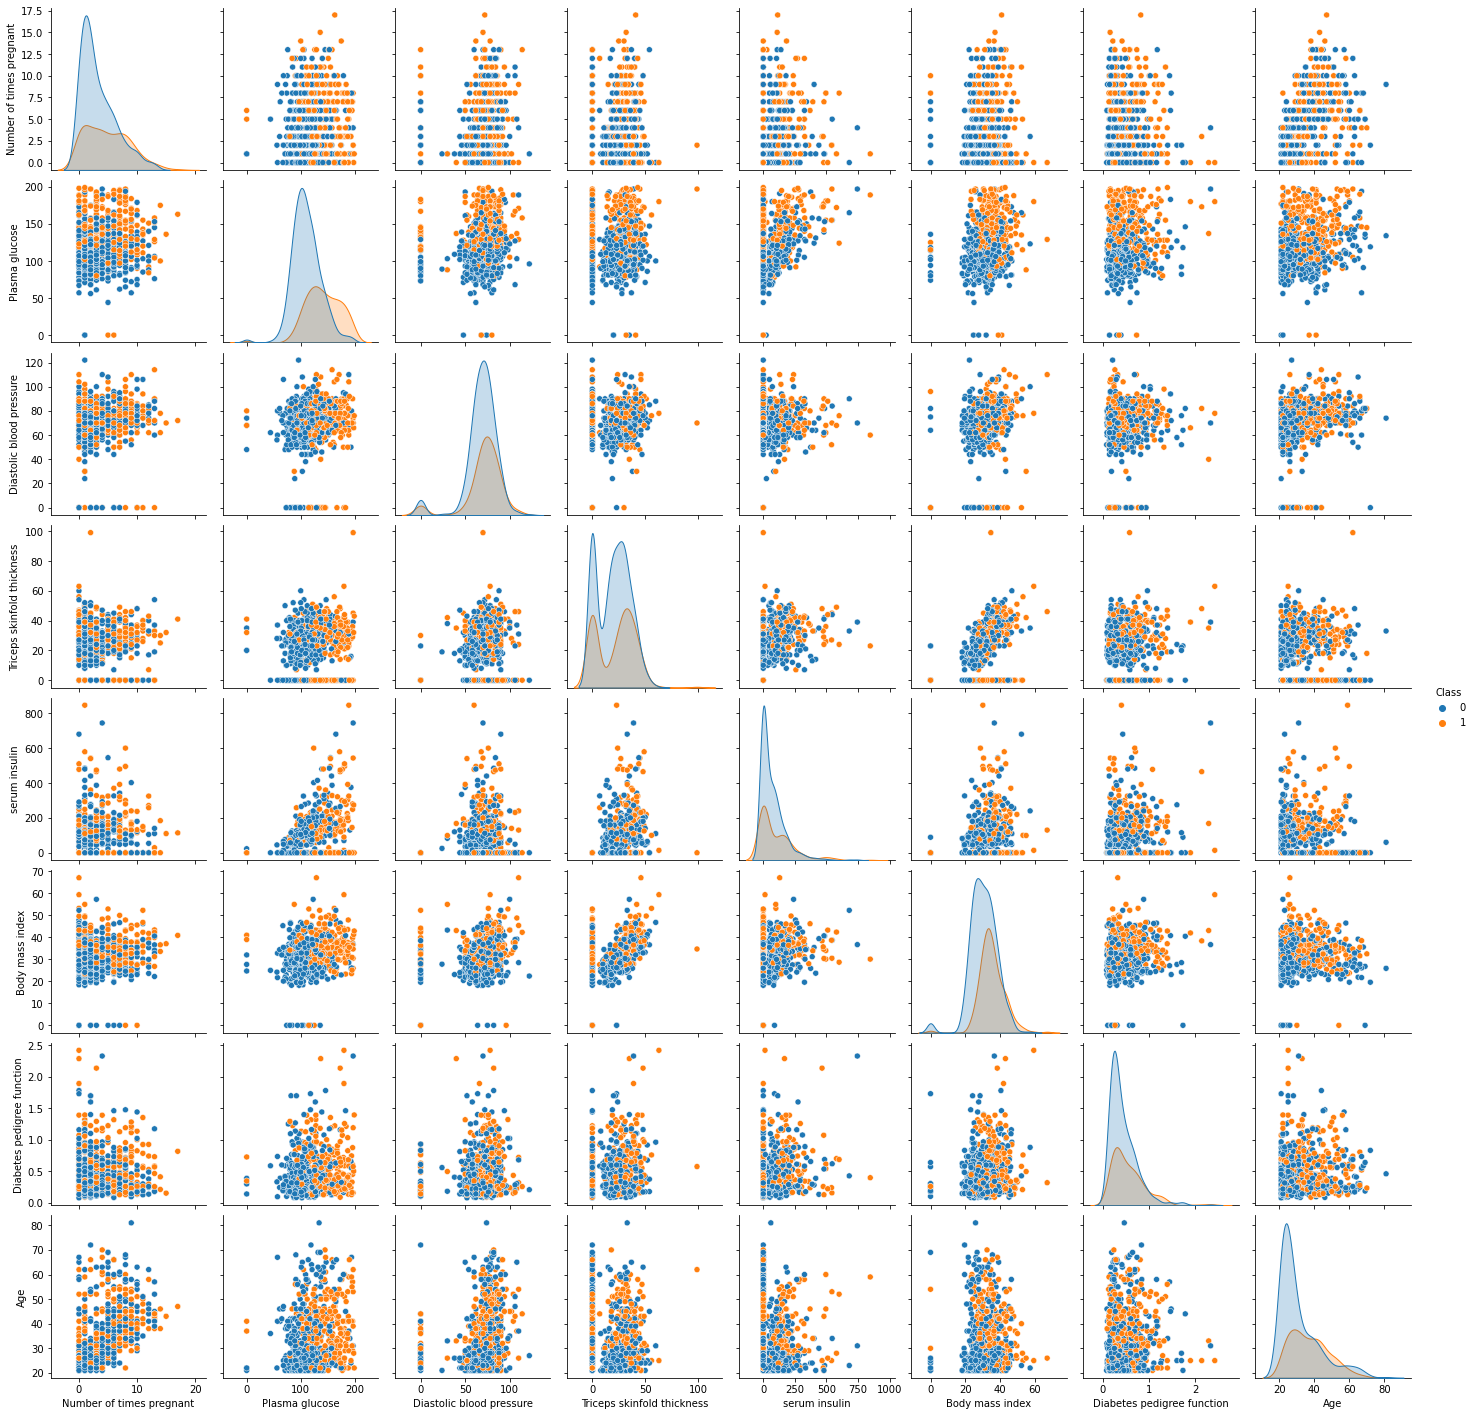

In [10]:
sns.pairplot(dataset, hue='Class')

We plot the heatmap by using the correlation for the dataset. This helps us eliminate any features that may not help with prediction.

<AxesSubplot:>

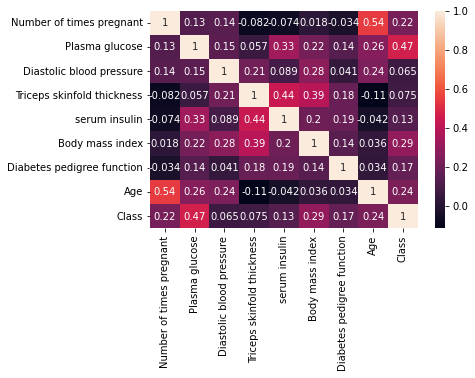

In [11]:
#correlation goes between -1 and 1. 
sns.heatmap(dataset.corr(), annot=True)

We see that all feature have some relationship with Class so we keep all of them. Plasma glucose has the strongest relationship with Class(a person having diabetes or not). Age and Body Mass Index are also strong influencers.

Now that we understand the data let’s create the input features and the target variables and get the data ready for inputting it to our neural network by preprocessing the data.

In [12]:
# creating input features and target variables
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

In [13]:
X.head(2)

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


Since our input features are at different scales we need to standardize the input.

In [14]:
X.shape

(768, 8)

In [15]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
X.shape

(768, 8)

We now split the input features and target variables into training dataset and test dataset. out test dataset will be 30% of our entire dataset.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In Sequential models, each layer has exactly one input tensor and one output tensor. However, in Functional models, layers can have multiple inputs and outputs. This allows for more complex architectures, which can lead to different outputs.


We use Dense library to build input, hidden and output layers of a neural network.

In [18]:
from keras import Sequential
from keras.layers import Dense

Remember that the input is always the number of features of a sample. 
We have 8 input features and one target variable. 2 Hidden layers. Each hidden layer will have 4 nodes.

ReLu will be the activation function for hidden layers. As this is a binary classification problem we will use sigmoid as the activation function.

In Keras, a variety of initializers are available, such as Zeros , Ones , RandomNormal , RandomUniform , TruncatedNormal , VarianceScaling , Orthogonal , Identity , lecun_uniform , glorot_normal , glorot_uniform , he_normal , and he_uniform .

# Initializers define the way to set the initial random weights of Keras layers.

Random normal initializer generates tensors with a normal distribution:
Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graphical form, the normal distribution appears as a "bell curve".

# There's Only One Bias per Layer.In simple words, neural network bias can be defined as the constant which is added to the product of features and weights. It is used to offset the result. It helps the models to shift the activation function towards the positive or negative side.

# So the role of bias isn't to act as a threshold, but to help ensure the output best fits the incoming signal. Biases are tuned alongside weights by learning algorithms such as gradient descent. 

# There's one bias unit per layer

if you want to make a drawing of your neural network it may be more convenient to place a separate bias node (each with a value of 1.0) in every layer except for the output layer, and connect each of those bias nodes to all the nodes in the layer directly after it. Mathematically, these two interpretations are equivalent, since in both cases every non-input node has an incoming weighted connection from a node that always has an activation level of 1.0.

In [19]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Once the different layers are created we now compile the neural network.

As this is a binary classification problem, we use binary_crossentropy to calculate the loss function between the actual output and the predicted output.

To optimize our neural network we use Adam. Adam stands for Adaptive moment estimation. Adam is a combination of RMSProp + Momentum.
we use accuracy as the metrics to measure the performance of the model

In [20]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

we now fit out training data to the model we created. we use a batch_size of 10. This implies that we use 10 samples per gradient update.

We iterate over 100 epochs to train the model. An epoch is an iteration over the entire data set.
each epochs as n number of batches because the epoch is the entire dataset and the batch is a sample on order to do not
train the model into the whole dataset at once, to avoid computational issues. 

In [21]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
54/54 [==============================] - 2s 3ms/step - loss: 0.6902 - accuracy: 0.6443
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6462
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6462
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6443
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.7151
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7784
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7840
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7896
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7989
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7952
Epoch 11/

Epoch 99/100., gives the best results. 
54/54 [==============================] - 0s 6ms/step - loss: 0.4175 - accuracy: 0.8119

We can also evaluate the loss value & metrics values for the model in test mode using evaluate function

In [22]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 1s 5ms/step - loss: 0.4161 - accuracy: 0.8156


[0.4160870313644409, 0.8156424760818481]

We now predict the output for our test dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0

In [23]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[122  31]
 [ 34  44]]


total of true positive and true negative is 179 (122+44) out of231 observations in the test dataset. so our accuracy for test dataset is around 78%.

# With the given inputs we can predict with a 78% accuracy if the person will have diabetes or not